In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from ngram import *
from baselines import *
from error_analysis import *

In [2]:
d_b, d_r =load_cf_data()
d_br = pd.concat([d_b, d_r])

In [3]:
max_features = 5000
architecture = [50, 20]

In [4]:
ngram_feature_pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range = (1,5), analyzer = 'char', max_features = max_features)),
    ('tfidf', TfidfTransformer(sublinear_tf=True,norm='l2')),
])

In [5]:
training_epochs = 75
batch_size = 500
display_step = 500

# BR on BR, EDP

In [6]:
X_train, y_train, X_test, y_test = tf_prep(d_br, ngram_feature_pipeline, 'recipient', empirical_dist)

Fit a softmax regression to the empirical distribtion of annotions over answer choices.

Batch: 0001 cost= 65.130706787

	Train Micro ROC: 0.83531692779
	Test Micro ROC: 0.839093797575

	Train Micro F1: 0.17683378612
	Test Micro F1: 0.172650878533

	Train Macro F1: 0.17683378612
	Test Macro F1: 0.172650878533

	Train Pearson Correlation:  0.0504961172778
	Test Pearson Correlation:  0.0576443940761

	Train Spearman Correlation:  0.0577249387962
	Test Spearman Correlation:  0.0565895634968

	Train RMSE:  0.40687589871182844
	Test RMSE:  0.4017633841739385

	Train R^2:  -0.480200589103
	Test R^2:  -0.466948049146


Batch: 0501 cost= 32.111542932

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.946051848231
	Test Micro ROC: 0.945366016896

	Train Micro F1: 0.425246025738
	Test Micro F1: 0.399211045365

	Train Macro F1: 0.425246025738
	Test Macro F1: 0.399211045365

	Train Pearson Correlation:  0.507491941076
	Test Pearson Correlation:  0.484746108418

	Train Spearman Correlation:  0.352668188347
	Test Spearman Correlation:  0.335600757457

	Train RMSE:  0.21457919875851084
	Test RMSE:  0.21623481898792385

	Train R^2:  -0.888882993114
	Test R^2:  -0.94113552643


Batch: 1001 cost= 15.664922564

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.970379494295
	Test Micro ROC: 0.970305209425

	Train Micro F1: 0.559815668203
	Test Micro F1: 0.554744525547

	Train Macro F1: 0.559815668203
	Test Macro F1: 0.554744525547

	Train Pearson Correlation:  0.686663249289
	Test Pearson Correlation:  0.673725878619

	Train Spearman Correlation:  0.492441173948
	Test Spearman Correlation:  0.475255264454

	Train RMSE:  0.1788648585815007
	Test RMSE:  0.17966594878219222

	Train R^2:  -0.176597748678
	Test R^2:  -0.237956739736


Batch: 1501 cost= 7.554307842

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.979068485074
	Test Micro ROC: 0.978555537624

	Train Micro F1: 0.631039660807
	Test Micro F1: 0.627651792246

	Train Macro F1: 0.631039660807
	Test Macro F1: 0.627651792246

	Train Pearson Correlation:  0.759095617025
	Test Pearson Correlation:  0.744063910712

	Train Spearman Correlation:  0.566774409763
	Test Spearman Correlation:  0.547672527063

	Train RMSE:  0.16046501998172846
	Test RMSE:  0.16268577194811826

	Train R^2:  0.186456556222
	Test R^2:  0.130221906537


Batch: 2001 cost= 3.653103814

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.98326385254
	Test Micro ROC: 0.982472861351

	Train Micro F1: 0.672999572101
	Test Micro F1: 0.661204132526

	Train Macro F1: 0.672999572101
	Test Macro F1: 0.661204132526

	Train Pearson Correlation:  0.795222621332
	Test Pearson Correlation:  0.778211744047

	Train Spearman Correlation:  0.608182579498
	Test Spearman Correlation:  0.588289550523

	Train RMSE:  0.14957545649066054
	Test RMSE:  0.15296615396774874

	Train R^2:  0.351288101044
	Test R^2:  0.295164250925


Batch: 2501 cost= 1.684742720

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.985682350632
	Test Micro ROC: 0.984657938771

	Train Micro F1: 0.707183225489
	Test Micro F1: 0.692360163711

	Train Macro F1: 0.707183225489
	Test Macro F1: 0.692360163711

	Train Pearson Correlation:  0.817260758891
	Test Pearson Correlation:  0.798092137692

	Train Spearman Correlation:  0.632825108003
	Test Spearman Correlation:  0.611566522207

	Train RMSE:  0.14192499093892508
	Test RMSE:  0.146530593065567

	Train R^2:  0.464463551756
	Test R^2:  0.406551437978


Batch: 3001 cost= 0.939951450

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.987069045824
	Test Micro ROC: 0.985618815348

	Train Micro F1: 0.730455259027
	Test Micro F1: 0.717731421121

	Train Macro F1: 0.730455259027
	Test Macro F1: 0.717731421121

	Train Pearson Correlation:  0.83255172691
	Test Pearson Correlation:  0.810206661066

	Train Spearman Correlation:  0.649286927337
	Test Spearman Correlation:  0.626004332882

	Train RMSE:  0.13661253244754945
	Test RMSE:  0.14266975091209544

	Train R^2:  0.521514337836
	Test R^2:  0.458247298838


Batch: 3501 cost= 0.618284742

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.988542824065
	Test Micro ROC: 0.986978335735

	Train Micro F1: 0.748416988417
	Test Micro F1: 0.731754161332

	Train Macro F1: 0.748416988417
	Test Macro F1: 0.731754161332

	Train Pearson Correlation:  0.845278452074
	Test Pearson Correlation:  0.820583858724

	Train Spearman Correlation:  0.657352098806
	Test Spearman Correlation:  0.630123274247

	Train RMSE:  0.1316792526232204
	Test RMSE:  0.13902782322593618

	Train R^2:  0.572494789958
	Test R^2:  0.507020942452


Batch: 4001 cost= 0.487060111

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.989227909339
	Test Micro ROC: 0.98746456686

	Train Micro F1: 0.757409104797
	Test Micro F1: 0.737242472266

	Train Macro F1: 0.757409104797
	Test Macro F1: 0.737242472266

	Train Pearson Correlation:  0.851818660767
	Test Pearson Correlation:  0.825404678935

	Train Spearman Correlation:  0.666006624407
	Test Spearman Correlation:  0.634338300071

	Train RMSE:  0.12912742449421627
	Test RMSE:  0.1373561608438891

	Train R^2:  0.595904178212
	Test R^2:  0.526288162046


Batch: 4501 cost= 0.430184896

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.989673451519
	Test Micro ROC: 0.987514123147

	Train Micro F1: 0.760087582108
	Test Micro F1: 0.738680465718

	Train Macro F1: 0.760087582108
	Test Macro F1: 0.738680465718

	Train Pearson Correlation:  0.856502328324
	Test Pearson Correlation:  0.825549559045

	Train Spearman Correlation:  0.67079914133
	Test Spearman Correlation:  0.635057510471

	Train RMSE:  0.12753505108336033
	Test RMSE:  0.13732274920823376

	Train R^2:  0.590434024329
	Test R^2:  0.51053055456


Batch: 5001 cost= 0.409271698

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.990052616387
	Test Micro ROC: 0.987548492117

	Train Micro F1: 0.774227660699
	Test Micro F1: 0.746791862285

	Train Macro F1: 0.774227660699
	Test Macro F1: 0.746791862285

	Train Pearson Correlation:  0.860080460148
	Test Pearson Correlation:  0.828280093469

	Train Spearman Correlation:  0.672176356156
	Test Spearman Correlation:  0.635364966269

	Train RMSE:  0.1258135489484373
	Test RMSE:  0.13626640508654986

	Train R^2:  0.616526402504
	Test R^2:  0.535814314454


Batch: 5501 cost= 0.404020472

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.990085813831
	Test Micro ROC: 0.987538821124

	Train Micro F1: 0.775501046964
	Test Micro F1: 0.751086281813

	Train Macro F1: 0.775501046964
	Test Macro F1: 0.751086281813

	Train Pearson Correlation:  0.861924738568
	Test Pearson Correlation:  0.828647135273

	Train Spearman Correlation:  0.676938705137
	Test Spearman Correlation:  0.639925956936

	Train RMSE:  0.1251070523557129
	Test RMSE:  0.13641089004365392

	Train R^2:  0.63580858472
	Test R^2:  0.554419303341


Batch: 6001 cost= 0.398582376

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.990288702593
	Test Micro ROC: 0.98814415278

	Train Micro F1: 0.76515505688
	Test Micro F1: 0.73992910087

	Train Macro F1: 0.76515505688
	Test Macro F1: 0.73992910087

	Train Pearson Correlation:  0.861980873595
	Test Pearson Correlation:  0.829981286499

	Train Spearman Correlation:  0.677609393631
	Test Spearman Correlation:  0.63824376271

	Train RMSE:  0.1251487096073248
	Test RMSE:  0.1358073931944462

	Train R^2:  0.624809045809
	Test R^2:  0.54242226286


Batch: 6501 cost= 0.392571455

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.990560658793
	Test Micro ROC: 0.988034149303

	Train Micro F1: 0.777146321134
	Test Micro F1: 0.749294006903

	Train Macro F1: 0.777146321134
	Test Macro F1: 0.749294006903

	Train Pearson Correlation:  0.864399284525
	Test Pearson Correlation:  0.830478656118

	Train Spearman Correlation:  0.677505249665
	Test Spearman Correlation:  0.641244660688

	Train RMSE:  0.12379573381349096
	Test RMSE:  0.13543670921593506

	Train R^2:  0.642773722642
	Test R^2:  0.558664875134


Batch: 7001 cost= 0.393966677

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.990347859515
	Test Micro ROC: 0.987542246171

	Train Micro F1: 0.779769431015
	Test Micro F1: 0.754856614246

	Train Macro F1: 0.779769431015
	Test Macro F1: 0.754856614246

	Train Pearson Correlation:  0.864826092344
	Test Pearson Correlation:  0.829750275812

	Train Spearman Correlation:  0.680478234824
	Test Spearman Correlation:  0.641594143278

	Train RMSE:  0.12406911697014451
	Test RMSE:  0.13614305193542475

	Train R^2:  0.64440092995
	Test R^2:  0.557091168436


Batch: 7501 cost= 0.394430678

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.990676238646
	Test Micro ROC: 0.987877068863

	Train Micro F1: 0.775854144324
	Test Micro F1: 0.749841671944

	Train Macro F1: 0.775854144324
	Test Macro F1: 0.749841671944

	Train Pearson Correlation:  0.866319106971
	Test Pearson Correlation:  0.830377872185

	Train Spearman Correlation:  0.681061451146
	Test Spearman Correlation:  0.642017330689

	Train RMSE:  0.12334315303198777
	Test RMSE:  0.13549195939962486

	Train R^2:  0.627750711385
	Test R^2:  0.535807982604


Batch: 8001 cost= 0.392842741

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.990795957032
	Test Micro ROC: 0.988004583298

	Train Micro F1: 0.78015903067
	Test Micro F1: 0.756959649672

	Train Macro F1: 0.78015903067
	Test Macro F1: 0.756959649672

	Train Pearson Correlation:  0.86791083181
	Test Pearson Correlation:  0.831819715621

	Train Spearman Correlation:  0.682763975682
	Test Spearman Correlation:  0.64110451023

	Train RMSE:  0.12234394474572759
	Test RMSE:  0.134942186075518

	Train R^2:  0.650966303037
	Test R^2:  0.560815621248


Batch: 8501 cost= 0.391768855

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.990867932614
	Test Micro ROC: 0.987964786302

	Train Micro F1: 0.783405253993
	Test Micro F1: 0.744566929134

	Train Macro F1: 0.783405253993
	Test Macro F1: 0.744566929134

	Train Pearson Correlation:  0.868753486203
	Test Pearson Correlation:  0.830400329608

	Train Spearman Correlation:  0.683538692007
	Test Spearman Correlation:  0.640735665574

	Train RMSE:  0.12215390436153457
	Test RMSE:  0.13546274854099707

	Train R^2:  0.644011841153
	Test R^2:  0.548476781821


Optimization Finished!


/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

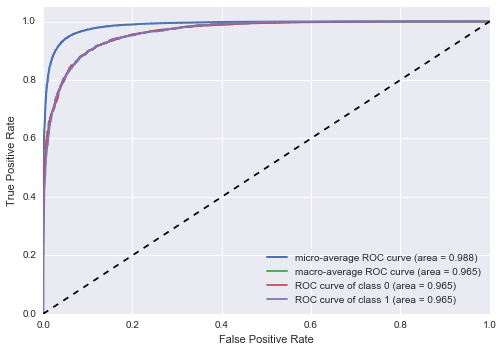

In [7]:
NN_CLF(X_train,
        y_train,
        X_test,
        y_test,
        training_epochs = training_epochs,
        batch_size = batch_size,
        display_step = display_step, 
        architecture = architecture)

# BR on BR, One-Hot

Batch: 0001 cost= 72.150474548

	Train Micro ROC: 0.449673594983
	Test Micro ROC: 0.449616810957

	Train Micro F1: 0.199783555231
	Test Micro F1: 0.188901288424

	Train Macro F1: 0.199783555231
	Test Macro F1: 0.188901288424

	Train Pearson Correlation:  0.014188529658
	Test Pearson Correlation:  0.00685021621157

	Train Spearman Correlation:  0.0252510626626
	Test Spearman Correlation:  0.0294567099641

	Train RMSE:  0.6431931259583505
	Test RMSE:  0.642779425094109

	Train R^2:  -0.81878545467
	Test R^2:  -0.820251839898


Batch: 0501 cost= 38.416214647

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.950985175799
	Test Micro ROC: 0.94532516032

	Train Micro F1: 0.533807829181
	Test Micro F1: 0.50200679222

	Train Macro F1: 0.533807829181
	Test Macro F1: 0.50200679222

	Train Pearson Correlation:  0.553573515892
	Test Pearson Correlation:  0.511913327235

	Train Spearman Correlation:  0.374923623901
	Test Spearman Correlation:  0.353747845797

	Train RMSE:  0.25653164856847854
	Test RMSE:  0.2644169206254756

	Train R^2:  0.111762914288
	Test R^2:  0.0280933068909


Batch: 1001 cost= 21.375211548

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.970652974721
	Test Micro ROC: 0.965243381085

	Train Micro F1: 0.61983198814
	Test Micro F1: 0.568406687137

	Train Macro F1: 0.61983198814
	Test Macro F1: 0.568406687137

	Train Pearson Correlation:  0.67476443456
	Test Pearson Correlation:  0.630078110913

	Train Spearman Correlation:  0.446526881575
	Test Spearman Correlation:  0.425263530172

	Train RMSE:  0.21316002513724364
	Test RMSE:  0.2227362504588767

	Train R^2:  0.203985953661
	Test R^2:  0.098424096925


Batch: 1501 cost= 11.376784717

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.98003433609
	Test Micro ROC: 0.975634302925

	Train Micro F1: 0.670903010033
	Test Micro F1: 0.636490250696

	Train Macro F1: 0.670903010033
	Test Macro F1: 0.636490250696

	Train Pearson Correlation:  0.742257598595
	Test Pearson Correlation:  0.707171849428

	Train Spearman Correlation:  0.506203681885
	Test Spearman Correlation:  0.487001448293

	Train RMSE:  0.19135355708983498
	Test RMSE:  0.19941084428801498

	Train R^2:  0.332872776225
	Test R^2:  0.236681227825


Batch: 2001 cost= 5.845669734

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.985276538975
	Test Micro ROC: 0.980562884409

	Train Micro F1: 0.726445951336
	Test Micro F1: 0.690476190476

	Train Macro F1: 0.726445951336
	Test Macro F1: 0.690476190476

	Train Pearson Correlation:  0.785833648927
	Test Pearson Correlation:  0.752710502772

	Train Spearman Correlation:  0.549046463478
	Test Spearman Correlation:  0.529337028038

	Train RMSE:  0.17534623818459982
	Test RMSE:  0.18425230142019286

	Train R^2:  0.488661930381
	Test R^2:  0.409469601047


Batch: 2501 cost= 2.691616711

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.988184134136
	Test Micro ROC: 0.983640184116

	Train Micro F1: 0.729333884981
	Test Micro F1: 0.689773507207

	Train Macro F1: 0.729333884981
	Test Macro F1: 0.689773507207

	Train Pearson Correlation:  0.796872798258
	Test Pearson Correlation:  0.764281789304

	Train Spearman Correlation:  0.573783710065
	Test Spearman Correlation:  0.552036757108

	Train RMSE:  0.17682710634086218
	Test RMSE:  0.18554464714656446

	Train R^2:  0.454715735437
	Test R^2:  0.372597868531


Batch: 3001 cost= 1.360150777

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.990422554272
	Test Micro ROC: 0.984705341043

	Train Micro F1: 0.782714732109
	Test Micro F1: 0.741276328199

	Train Macro F1: 0.782714732109
	Test Macro F1: 0.741276328199

	Train Pearson Correlation:  0.826095445473
	Test Pearson Correlation:  0.787889277703

	Train Spearman Correlation:  0.587781858784
	Test Spearman Correlation:  0.564437752268

	Train RMSE:  0.16297115834552572
	Test RMSE:  0.17543245501248816

	Train R^2:  0.603136034113
	Test R^2:  0.522075404637


Batch: 3501 cost= 0.720025745

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.991161742585
	Test Micro ROC: 0.98548524783

	Train Micro F1: 0.750230879019
	Test Micro F1: 0.700699300699

	Train Macro F1: 0.750230879019
	Test Macro F1: 0.700699300699

	Train Pearson Correlation:  0.810035444591
	Test Pearson Correlation:  0.769719255228

	Train Spearman Correlation:  0.5890014207
	Test Spearman Correlation:  0.566710670448

	Train RMSE:  0.17807257018358139
	Test RMSE:  0.18926684925298562

	Train R^2:  0.435109416385
	Test R^2:  0.329736185606


Batch: 4001 cost= 0.428512575

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.993572477497
	Test Micro ROC: 0.986246305243

	Train Micro F1: 0.81724217135
	Test Micro F1: 0.738520408163

	Train Macro F1: 0.81724217135
	Test Macro F1: 0.738520408163

	Train Pearson Correlation:  0.844237312796
	Test Pearson Correlation:  0.79271418988

	Train Spearman Correlation:  0.598922019244
	Test Spearman Correlation:  0.576814156312

	Train RMSE:  0.15866565104879018
	Test RMSE:  0.1762020926250205

	Train R^2:  0.619807249407
	Test R^2:  0.508765921887


Batch: 4501 cost= 0.272096986

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.994094863515
	Test Micro ROC: 0.986631311605

	Train Micro F1: 0.818336688865
	Test Micro F1: 0.737726098191

	Train Macro F1: 0.818336688865
	Test Macro F1: 0.737726098191

	Train Pearson Correlation:  0.839496900467
	Test Pearson Correlation:  0.78632066518

	Train Spearman Correlation:  0.599972317903
	Test Spearman Correlation:  0.580123582742

	Train RMSE:  0.16613658054372113
	Test RMSE:  0.18353058769869335

	Train R^2:  0.588034190649
	Test R^2:  0.472976133765


Batch: 5001 cost= 0.224575668

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.995440842825
	Test Micro ROC: 0.986334724421

	Train Micro F1: 0.858998007821
	Test Micro F1: 0.744882370914

	Train Macro F1: 0.858998007821
	Test Macro F1: 0.744882370914

	Train Pearson Correlation:  0.857032271938
	Test Pearson Correlation:  0.798507239534

	Train Spearman Correlation:  0.60425226099
	Test Spearman Correlation:  0.585054480285

	Train RMSE:  0.15532579821382816
	Test RMSE:  0.17604229018864198

	Train R^2:  0.664777042024
	Test R^2:  0.549830494986


Batch: 5501 cost= 0.197582446

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.996122373605
	Test Micro ROC: 0.985850672871

	Train Micro F1: 0.873842177066
	Test Micro F1: 0.752075919336

	Train Macro F1: 0.873842177066
	Test Macro F1: 0.752075919336

	Train Pearson Correlation:  0.862208531828
	Test Pearson Correlation:  0.799574229708

	Train Spearman Correlation:  0.599096932379
	Test Spearman Correlation:  0.577865152337

	Train RMSE:  0.1544882007534028
	Test RMSE:  0.1772925548436083

	Train R^2:  0.693058905371
	Test R^2:  0.575749614486


Batch: 6001 cost= 0.180535764

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.996849556353
	Test Micro ROC: 0.986200536491

	Train Micro F1: 0.883242059146
	Test Micro F1: 0.747252747253

	Train Macro F1: 0.883242059146
	Test Macro F1: 0.747252747253

	Train Pearson Correlation:  0.865202916678
	Test Pearson Correlation:  0.795412045777

	Train Spearman Correlation:  0.604041708921
	Test Spearman Correlation:  0.581514101952

	Train RMSE:  0.15477949992830597
	Test RMSE:  0.1799477922015813

	Train R^2:  0.681758449343
	Test R^2:  0.545819274706


Batch: 6501 cost= 0.158124176

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.996836646624
	Test Micro ROC: 0.98643866552

	Train Micro F1: 0.867376872009
	Test Micro F1: 0.732878935411

	Train Macro F1: 0.867376872009
	Test Macro F1: 0.732878935411

	Train Pearson Correlation:  0.851663137483
	Test Pearson Correlation:  0.779324630463

	Train Spearman Correlation:  0.601400761912
	Test Spearman Correlation:  0.577600427002

	Train RMSE:  0.16494918209168166
	Test RMSE:  0.18872845066758004

	Train R^2:  0.607476787929
	Test R^2:  0.453393130681


Batch: 7001 cost= 0.153218924

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.997472347798
	Test Micro ROC: 0.983516320121

	Train Micro F1: 0.904588291945
	Test Micro F1: 0.745317305004

	Train Macro F1: 0.904588291945
	Test Macro F1: 0.745317305004

	Train Pearson Correlation:  0.873395005818
	Test Pearson Correlation:  0.790564755312

	Train Spearman Correlation:  0.600134253513
	Test Spearman Correlation:  0.573577059214

	Train RMSE:  0.15270189933006073
	Test RMSE:  0.1850636032817257

	Train R^2:  0.729477399853
	Test R^2:  0.590216841289


Batch: 7501 cost= 0.147286104

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.997693858577
	Test Micro ROC: 0.986144743552

	Train Micro F1: 0.886203732028
	Test Micro F1: 0.735958683021

	Train Macro F1: 0.886203732028
	Test Macro F1: 0.735958683021

	Train Pearson Correlation:  0.853822509539
	Test Pearson Correlation:  0.773256486197

	Train Spearman Correlation:  0.599058456127
	Test Spearman Correlation:  0.57518333586

	Train RMSE:  0.16620780960549156
	Test RMSE:  0.19243793310843987

	Train R^2:  0.612853340401
	Test R^2:  0.445409380441


Batch: 8001 cost= 0.146839844

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.998170538449
	Test Micro ROC: 0.986216444135

	Train Micro F1: 0.907097347755
	Test Micro F1: 0.739743188224

	Train Macro F1: 0.907097347755
	Test Macro F1: 0.739743188224

	Train Pearson Correlation:  0.860929016724
	Test Pearson Correlation:  0.777204131169

	Train Spearman Correlation:  0.598220929475
	Test Spearman Correlation:  0.572052474

	Train RMSE:  0.1639793393166528
	Test RMSE:  0.19234689995720317

	Train R^2:  0.652359358312
	Test R^2:  0.486146579831


Batch: 8501 cost= 0.132184047

	Train Micro ROC:

/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

 0.999060270848
	Test Micro ROC: 0.984870637876

	Train Micro F1: 0.940572585309
	Test Micro F1: 0.735917625681

	Train Macro F1: 0.940572585309
	Test Macro F1: 0.735917625681

	Train Pearson Correlation:  0.872700880514
	Test Pearson Correlation:  0.778765150334

	Train Spearman Correlation:  0.596043346601
	Test Spearman Correlation:  0.56885698456

	Train RMSE:  0.15658630114423064
	Test RMSE:  0.18921907664040397

	Train R^2:  0.693464632085
	Test R^2:  0.51891375377


Optimization Finished!


/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Users/ellerywulczyn/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class p

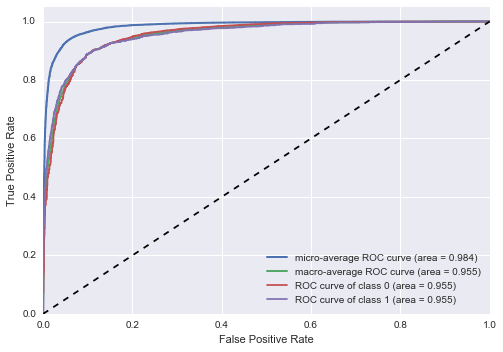

In [8]:
NN_CLF(X_train,
        y_train,
        X_test,
        y_test,
        training_epochs = training_epochs,
        batch_size = batch_size,
        display_step = display_step,
        architecture = architecture,
        one_hot = True)

Conclusion: Spearman is 5 points higher in EDP model, Pearson and ROC are about the same. Spearman seems more appropriate than pearson (see link):

https://stats.stackexchange.com/questions/11746/what-could-cause-big-differences-in-correlation-coefficient-between-pearsons-an